# Unit 5 - Financial Planning

In [1]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [2]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [3]:
# Set current amount of crypto assets
# YOUR CODE HERE!
my_btc=1.2
my_eth=5.3

In [4]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [5]:
btc=requests.get("https://api.alternative.me/v2/ticker/Bitcoin/?convert=USD").json()
eth=requests.get("https://api.alternative.me/v2/ticker/Ethereum/?convert=USD").json()

In [6]:
# Fetch current BTC price
requests.get("https://api.alternative.me/v2/ticker/Bitcoin/?convert=USD")

# Fetch current ETH price
requests.get("https://api.alternative.me/v2/ticker/Ethereum/?convert=USD")

# Compute current value of my crpto
btcprice=btc['data']['1']['quotes']['USD']['price']
ethprice=eth['data']['1027']['quotes']['USD']['price']
# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc*btcprice}")
print(f"The current value of your {my_eth} ETH is ${my_eth*ethprice}")

The current value of your 1.2 BTC is $59857.2
The current value of your 5.3 ETH is $21410.091999999997


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [7]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [8]:
# Set Alpaca API key and secret
# YOUR CODE HERE!
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca API object
api = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2"
)

In [9]:
# Format current date as ISO format
from datetime import datetime
my_date = datetime.now()
currentdate=my_date.isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
# (use a limit=1000 parameter to call the most recent 1000 days of data)
alpaca_stocks = api.get_barset(
    tickers,
    timeframe,
    limit=1000,
).df

# Preview DataFrame
alpaca_stocks.head()

AGG                                        \
                             open    high       low    close     volume   
2017-05-24 00:00:00-04:00  109.25  109.50  109.2115  109.450  2325960.0   
2017-05-25 00:00:00-04:00  109.45  109.49  109.3701  109.460  1382257.0   
2017-05-26 00:00:00-04:00  109.46  109.54  109.4400  109.480   853245.0   
2017-05-30 00:00:00-04:00  109.58  109.66  109.5400  109.635  1199625.0   
2017-05-31 00:00:00-04:00  109.64  109.81  109.6400  109.750  2011554.0   

                              SPY                                      
                             open    high     low   close      volume  
2017-05-24 00:00:00-04:00     NaN     NaN     NaN     NaN         NaN  
2017-05-25 00:00:00-04:00  241.20  242.08  240.96  241.71  45278321.0  
2017-05-26 00:00:00-04:00  241.55  241.90  241.45  241.74  30002081.0  
2017-05-30 00:00:00-04:00  241.33  241.79  241.16  241.52  28437351.0  
2017-05-31 00:00:00-04:00  241.84  241.88  240.64  241.42  59140588.0

In [10]:
# Pick AGG and SPY close prices
agg_close=alpaca_stocks['AGG']['close'][-1]
spy_close=alpaca_stocks['SPY']['close'][-1]

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close}")
print(f"Current SPY closing price: ${spy_close}")

Current AGG closing price: $114.28
Current SPY closing price: $416.53


In [11]:
# Compute the current value of shares

# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${my_spy*spy_close}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg*agg_close}")

The current value of your 50 SPY shares is $20826.5
The current value of your 200 AGG shares is $22856.0


In [12]:
data = [{'ETH':my_eth*ethprice , 'BTC':my_btc*btcprice},
        {'SPY': my_spy*spy_close, 'AGG':my_agg*agg_close}]

### Savings Health Analysis

In [13]:
# Set monthly household income
monthly_income=12000

# Consolidate financial assets data
data = [{'ETH':my_eth*ethprice , 'BTC':my_btc*btcprice},
        {'SPY': my_spy*spy_close, 'AGG':my_agg*agg_close}]
# Create savings DataFrame
df_savings=pd.DataFrame(data,index=['CRYPTO','SHARES'],columns=['Amount'])
df_savings.loc['CRYPTO']=(my_eth*ethprice+my_btc*btcprice)
df_savings.loc['SHARES']=(my_spy*spy_close+my_agg*agg_close)
# Display savings DataFrame
display(df_savings)

,Amount
CRYPTO,81267.292
SHARES,43682.500


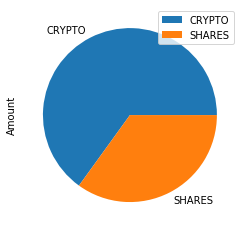

In [14]:
# Plot savings pie chart
df_savings.plot.pie(y='Amount')
index=(['CRYPTO', 'Shares'])

In [15]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3
# Calculate total amount of savings
total_savings=(df_savings.loc['SHARES']+df_savings.loc['CRYPTO']).sum()

# Validate saving health
if total_savings>emergency_fund:
    print('congratulations for having enough money in this fund.')
if total_savings==emergency_fund:
    print('congratulations on reaching this financial goal')
if total_savings<emergency_fund:
    print(f'you are {emergency_fund-total_savings} from reaching your goal.')

congratulations for having enough money in this fund.


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [16]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2016-05-13', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2021-05-13', tz='America/New_York').isoformat()

In [17]:
# Get 5 years' worth of historical data for SPY and AGG
# (use a limit=1000 parameter to call the most recent 1000 days of data)
df_stock_data = api.get_barset(
    tickers,
    timeframe='1D',
    limit=1000,
    start=start_date,
    end=end_date
).df

# Display sample data
df_stock_data.head()

AGG                                        \
                             open    high       low    close     volume   
2017-05-23 00:00:00-04:00  109.50  109.53  109.2100  109.240  1194872.0   
2017-05-24 00:00:00-04:00  109.25  109.50  109.2115  109.450  2325960.0   
2017-05-25 00:00:00-04:00  109.45  109.49  109.3701  109.460  1382257.0   
2017-05-26 00:00:00-04:00  109.46  109.54  109.4400  109.480   853245.0   
2017-05-30 00:00:00-04:00  109.58  109.66  109.5400  109.635  1199625.0   

                              SPY                                      
                             open    high     low   close      volume  
2017-05-23 00:00:00-04:00     NaN     NaN     NaN     NaN         NaN  
2017-05-24 00:00:00-04:00  240.32  240.73  239.93  240.59  37423590.0  
2017-05-25 00:00:00-04:00  241.20  242.08  240.96  241.71  45278321.0  
2017-05-26 00:00:00-04:00  241.55  241.90  241.45  241.74  30002081.0  
2017-05-30 00:00:00-04:00  241.33  241.79  241.16  241.52  28437351.0

In [18]:
agg_close_mc=df_stock_data['AGG']['close']
spy_close_mc=df_stock_data['SPY']['close']
dfclose=pd.concat([agg_close_mc,spy_close_mc],axis=1,join='inner')
dfclose.columns=['AGG CLOSE','SPY CLOSE']

In [19]:
dfclose.dropna(inplace=True)

In [20]:
dfclose.head()

,AGG CLOSE,SPY CLOSE
2017-05-24 00:00:00-04:00,109.450,240.59
2017-05-25 00:00:00-04:00,109.460,241.71
2017-05-26 00:00:00-04:00,109.480,241.74
2017-05-30 00:00:00-04:00,109.635,241.52
2017-05-31 00:00:00-04:00,109.750,241.42


The furthest I could go back was four years do to the limitation of only being able to pull 1000 days

In [21]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
# use limit=1000 to call the most recent 1000 days of data
import MCForecastTools
MCSimulation(df_stock_data,weights=[.4,.6],num_simulation=500,num_trading_days=(252*30))

In [26]:
# Printing the simulation input data
mc_portfolio=MCSimulation(df_stock_data,weights=[.4,.6],num_simulation=500,num_trading_days=(252*30))

In [25]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
mc_portfolio.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.994041,1.001200,1.010281,1.004367,1.007435,1.001090,1.003808,1.003464,1.013261,1.006075,...,0.992116,0.994957,0.993191,1.000025,0.993714,0.999810,0.998803,1.008645,1.006015,1.005797
2,0.997797,0.986590,1.021029,1.014438,0.997678,1.000361,1.005057,1.009551,1.011591,0.998855,...,0.988011,0.984283,0.988863,0.998656,0.992482,0.994191,1.003316,0.995315,1.015299,1.012638
3,1.005083,0.979168,1.011790,1.005851,1.003167,1.006276,1.002860,1.025133,1.019961,1.002678,...,0.980819,0.991731,1.001418,0.986464,0.983311,0.991141,1.021723,0.979554,1.011466,1.018474
4,1.016806,0.980015,1.020863,1.008873,1.001807,1.003862,1.012191,1.031722,1.021857,1.004047,...,0.993073,0.990538,1.008223,1.002893,0.993109,1.001185,1.037298,0.978131,1.020143,1.024664
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,32.502966,13.662467,56.875914,3.940642,13.416899,101.077186,6.240310,9.397160,14.731443,48.056165,...,10.063770,18.112040,9.214721,10.566873,16.054145,3.278467,11.411000,6.755017,29.233798,19.951401
7557,32.152954,13.769253,56.278305,3.977049,13.339091,101.642076,6.189407,9.531039,14.528679,47.499172,...,10.070725,18.221789,9.223031,10.515148,15.941720,3.257433,11.471738,6.816283,29.373799,20.047125
7558,31.862192,13.796059,56.955329,4.047238,13.376232,100.232872,6.150240,9.476084,14.579277,47.687806,...,10.109587,18.034969,9.272790,10.619553,15.860375,3.211334,11.468279,6.736926,29.211805,20.148492
7559,32.044435,13.660885,56.948370,4.005650,13.326369,101.037841,6.130177,9.519695,14.564654,46.854370,...,9.941445,18.138010,9.410861,10.601603,16.020112,3.202364,11.409108,6.754216,29.320285,20.308244


Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

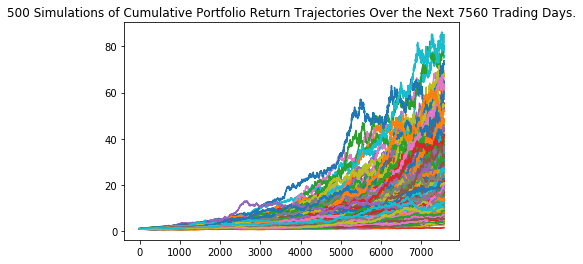

In [28]:
# Plot simulation outcomes
mc_portfolio.plot_simulation()

In [45]:
# Plot probability distribution and confidence intervals
mc_portfolio.summarize_cumulative_return()


count           500.000000
mean             18.537704
std              13.398256
min               1.450327
25%               9.274053
50%              14.539496
75%              23.431241
max              84.936686
95% CI Lower      4.038401
95% CI Upper     58.263457
Name: 7560, dtype: float64

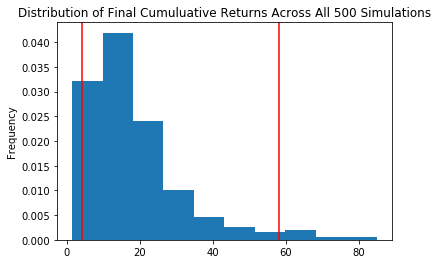

In [46]:
mc_portfolio.plot_distribution()

### Retirement Analysis

In [47]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl=mc_portfolio.summarize_cumulative_return()

# Print summary statistics
tbl

count           500.000000
mean             18.537704
std              13.398256
min               1.450327
25%               9.274053
50%              14.539496
75%              23.431241
max              84.936686
95% CI Lower      4.038401
95% CI Upper     58.263457
Name: 7560, dtype: float64

### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [48]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(tbl[8]*20000,2)
ci_upper = round(tbl[9]*20000,2)
# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $80768.01 and $1165269.13


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [49]:
# Set initial investment
initial_investment2 = (20000 * 1.5)

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower2 = round(tbl[8]*initial_investment2,2)
ci_upper2 = round(tbl[9]*initial_investment2,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment2} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower2} and ${ci_upper2}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $121152.02 and $1747903.7


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [50]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
mc_portfolio2=MCSimulation(df_stock_data,weights=[.4,.6],num_simulation=500,num_trading_days=(252*5))

In [51]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
mc_portfolio2.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.007424,1.000889,0.996540,1.008711,1.007255,0.998196,1.000334,0.999225,1.003912,1.003530,...,0.999551,0.989344,1.005565,1.011924,1.004527,0.999188,1.004863,0.993953,1.000782,1.004215
2,1.008057,1.001040,1.008282,1.001752,0.991751,0.997150,1.010737,0.999542,1.013703,0.993064,...,1.006874,0.985965,1.006089,1.011356,0.999488,1.006535,1.016316,1.000012,1.007173,1.005907
3,1.009993,0.995215,1.002726,1.009960,0.987270,0.996914,1.004246,0.997208,1.011558,0.988709,...,1.027572,0.990925,0.995696,1.027688,0.995674,0.998741,1.008453,0.998029,0.997466,0.995542
4,1.016931,0.991365,0.989018,1.021630,0.976012,0.990203,1.010041,0.981189,1.017581,0.984992,...,1.049431,1.014459,1.010453,1.032962,0.984347,1.020153,1.002932,0.993434,0.996004,0.999439
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,2.031778,1.800433,1.955146,1.409014,1.876147,1.153942,1.380308,1.143019,1.874360,1.691253,...,1.641635,1.779799,1.622073,1.914198,1.195010,1.898438,1.213598,1.330813,2.010188,1.366528
1257,2.062561,1.816829,1.950325,1.393912,1.865476,1.160486,1.372258,1.134234,1.872625,1.703034,...,1.645760,1.772618,1.622741,1.914013,1.191663,1.911044,1.205883,1.331187,2.005293,1.353449
1258,2.067191,1.809526,1.952942,1.404811,1.898803,1.156235,1.366385,1.136238,1.855845,1.720855,...,1.639298,1.761755,1.617630,1.923608,1.201463,1.912067,1.202085,1.326048,1.992936,1.344615
1259,2.083600,1.817247,1.954776,1.417376,1.890546,1.169421,1.348778,1.137479,1.842990,1.742756,...,1.633333,1.749986,1.605153,1.932912,1.190048,1.887419,1.211971,1.332984,2.000793,1.333373


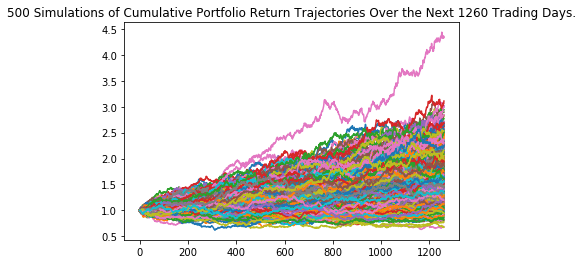

In [52]:
# Plot simulation outcomes
mc_portfolio2.plot_simulation()

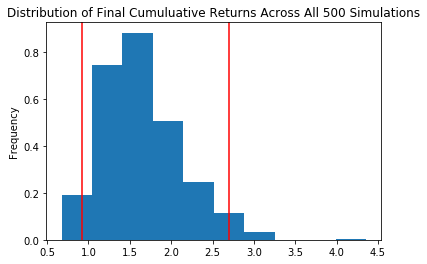

In [53]:
# Plot probability distribution and confidence intervals
mc_portfolio2.plot_distribution()

In [54]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl2=mc_portfolio.summarize_cumulative_return()

# Print summary statistics
tbl2

count           500.000000
mean             18.537704
std              13.398256
min               1.450327
25%               9.274053
50%              14.539496
75%              23.431241
max              84.936686
95% CI Lower      4.038401
95% CI Upper     58.263457
Name: 7560, dtype: float64

In [55]:
# Set initial investment
initial_investment

ci_lower3 = round(tbl[8]*initial_investment2,2)
ci_upper3 = round(tbl[9]*initial_investment2,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment2} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower3} and ${ci_upper3}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $121152.02 and $1747903.7


### Ten Years Retirement Option

In [56]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
mc_simulation3=MCSimulation(df_stock_data,weights=[.4,.6],num_simulation=500,num_trading_days=(252*10))

In [57]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
mc_simulation3.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.996893,0.995792,0.998606,1.006448,1.011958,1.006876,1.003833,1.008132,0.994432,1.005020,...,1.004596,0.988437,1.011666,0.993995,0.995320,1.010192,0.995354,1.006367,1.011126,1.008664
2,0.998578,0.998061,1.003857,0.995326,0.991320,1.000689,1.004734,1.012923,0.997816,1.009499,...,1.001094,0.988684,1.012427,0.985099,1.004350,1.003899,0.996717,1.015134,1.021068,1.010774
3,0.994310,0.995283,0.998503,0.994435,0.993613,1.006135,1.001912,1.012629,0.994322,1.008904,...,1.006776,0.991530,1.015190,0.992572,0.998575,1.009289,1.003425,1.018072,1.033572,1.008987
4,0.998153,1.000388,0.999601,1.000753,0.981964,1.000639,1.005771,1.008093,0.996026,1.006767,...,1.011850,0.995186,1.012381,0.992732,0.985520,1.009989,1.012532,1.014630,1.032349,1.015160
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,3.022935,4.127862,1.355293,2.439059,1.887878,2.118958,1.307580,2.938695,2.459247,1.840467,...,2.925961,2.233852,1.978605,2.081802,2.623593,5.550391,3.592476,4.894078,1.457885,3.047150
2517,3.034295,4.182793,1.329130,2.496333,1.888652,2.142468,1.310951,2.947499,2.434183,1.859379,...,2.885929,2.250078,1.995806,2.076523,2.611901,5.525634,3.574023,4.923505,1.475614,3.053800
2518,3.064372,4.176023,1.320976,2.491612,1.877892,2.134987,1.306138,2.947522,2.423159,1.860336,...,2.904916,2.246149,2.015334,2.080776,2.603462,5.539091,3.500166,4.870486,1.472828,3.014604
2519,3.082540,4.120449,1.322406,2.495945,1.867467,2.140833,1.298056,2.955440,2.423063,1.850691,...,2.911062,2.271603,2.030121,2.101083,2.562509,5.536997,3.457187,4.877500,1.492340,3.042439


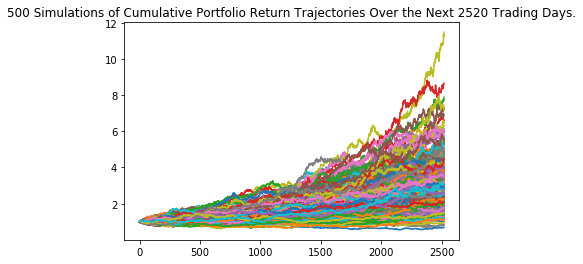

In [58]:
# Plot simulation outcomes
mc_simulation3.plot_simulation()

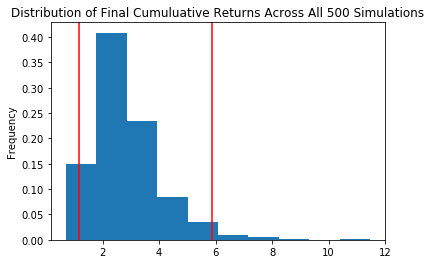

In [60]:
# Plot probability distribution and confidence intervals
mc_simulation3.plot_distribution()

In [61]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl3=mc_portfolio.summarize_cumulative_return()
# Print summary statistics
tbl3

count           500.000000
mean             18.537704
std              13.398256
min               1.450327
25%               9.274053
50%              14.539496
75%              23.431241
max              84.936686
95% CI Lower      4.038401
95% CI Upper     58.263457
Name: 7560, dtype: float64

In [64]:
# Set initial investment
ten_initial_investment=60000

ci_lower3 = round(tbl3[8]*initial_investment2,2)
ci_upper3 = round(tbl3[9]*initial_investment2,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${ten_initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower3} and ${ci_upper3}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 30 years will end within in the range of $121152.02 and $1747903.7
